**PROBLEM STATEMENT-**

**K-Means Clustering :** Classify the customers based on their Annual Income, Age and Spending Score

**Download Dataset :**
https://drive.google.com/file/d/1bah78yIy2N2nf6lvr8a6rYIjqghMFByU/view?usp=sharing

**About Data:**

The dataset contains 200 clients information, comprising useful data as each client Gender, Age, Annual Income (in thousands of dollars) and a Spending Score, attributed from the consuming historics and potential.



IMPORT DATA

In [ ]:
import pandas as pd

data = pd.read_csv("https://drive.google.com/uc?id=1bah78yIy2N2nf6lvr8a6rYIjqghMFByU")

**DISPLAY DATA**

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop(columns="CustomerID",inplace=True)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


HANDLING DUPLICATES

In [ ]:
data.duplicated().sum()

0

**DATA PREPROCESSING**

AS THERE IS NOT A SINGLE NULL IN ANY OF THE COLUMNS, WE ARE NOT GOING TO HANDLE THOSE

**ENCODING**

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
continous_columns = data.select_dtypes(include=['int64','float64']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

**SCALING**

In [ ]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

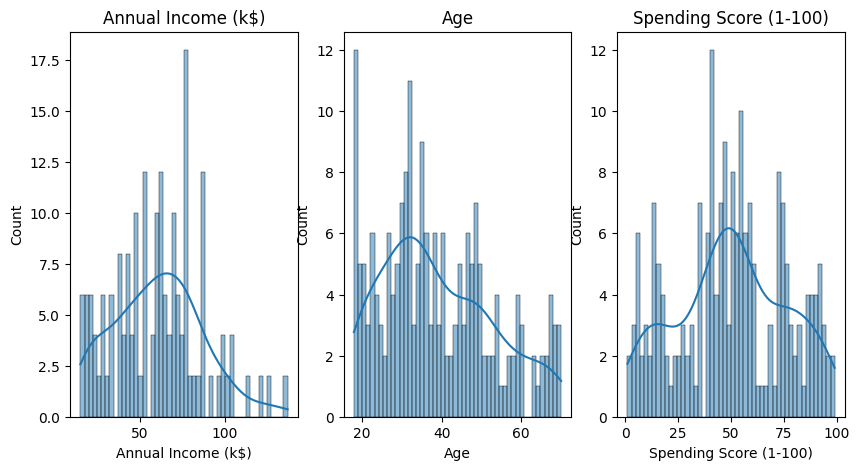

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,3,figsize=(10,5))
sns.histplot(data['Annual Income (k$)'],kde=True,bins=50,ax=ax[0])
ax[0].set_title('Annual Income (k$)')
sns.histplot(data['Age'],kde=True,bins=50,ax=ax[1])
ax[1].set_title('Age')
sns.histplot(data['Spending Score (1-100)'],kde=True,bins=50,ax=ax[2])
ax[2].set_title('Spending Score (1-100)')
plt.show()


In [ ]:
 from sklearn.preprocessing import MinMaxScaler

 scaler = MinMaxScaler()

 data[continous_columns] = scaler.fit_transform(data[continous_columns])

**MODEL**

In [ ]:
from sklearn.cluster import KMeans
data =data[["Annual Income (k$)","Spending Score (1-100)"]]
inertia=[]

for i in range(1,11):
  model = KMeans(n_clusters=i,random_state=42)
  model.fit(data)
  inertia.append(model.inertia_)

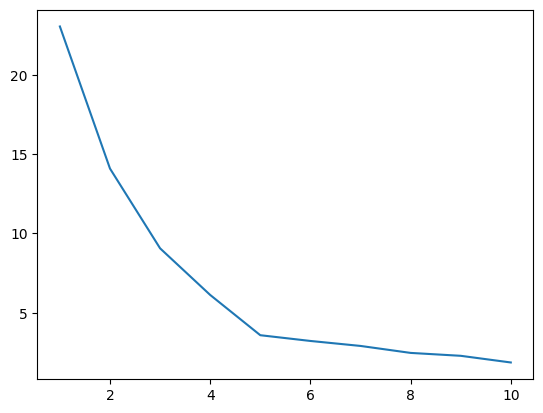

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),inertia)
plt.show()

FROM THE ELBOW METHOD WE CAN SAY THAT ,K=5 WORKS BETTER

In [ ]:
model=KMeans(n_clusters=5,random_state=42)
model.fit(data)

KMeans(n_clusters=5, random_state=42)

ADDING CLUTER COLUMN TO THE DATAFRAME

In [ ]:
data['Cluster']=model.labels_

GET THE CENTROIDS

In [ ]:
centroids = model.cluster_centers_
centroids

array([[0.32695811, 0.49533888],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.59631148, 0.16921769],
       [0.08792846, 0.19619666]])

# Visualizing the clusters (2D Annual_Income Spending Score,)

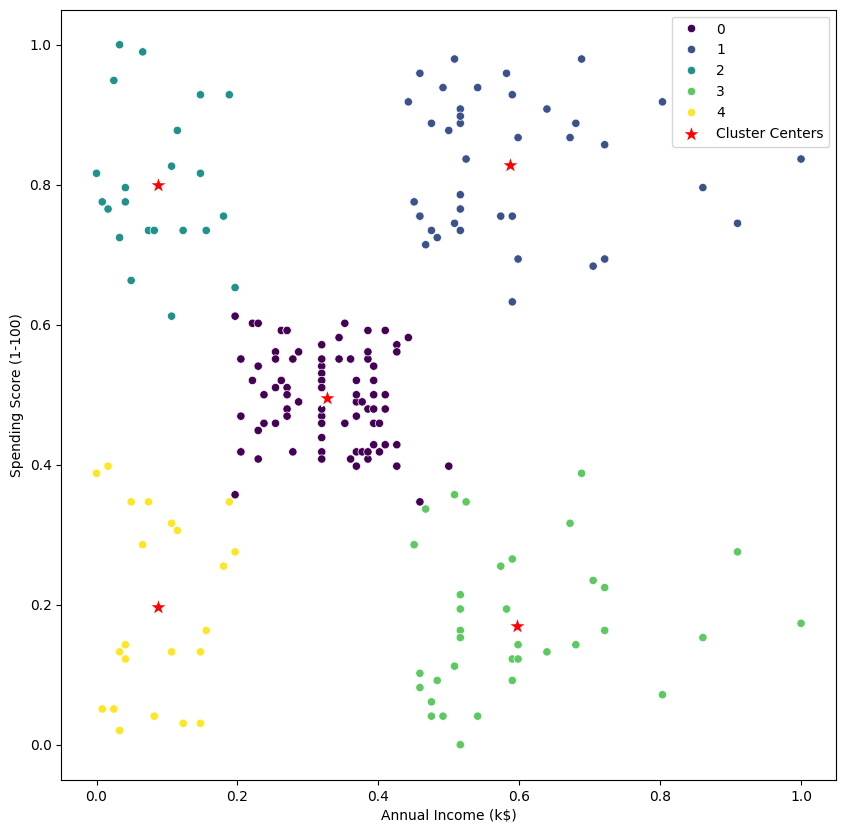

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10, 10,))

sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], data=data,hue=data['Cluster'], palette='viridis')
sns.scatterplot(x=centroids[:, 0],y= centroids[:, 1],  c='red', marker='*', s=200,label='Cluster Centers')


plt.show()

SILHOUETTE_SCORE

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(data,model.labels_)

0.8529940256167035